In [908]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [909]:
#Cargar desde un archivo .csv sin indice
df = pd.read_csv('Albany.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,...,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,0,0,https://www.airbnb.com/rooms/2992450,2024-11-05,city scrape,Luxury 2 bedroom apartment,nice,https://a0.muscache.com/pictures/44627226/0e72...,https://www.airbnb.com/users/show/4621559,Kenneth,...,2.0,1.7,1125,219,9.0,4.90,4.90,4.90,4.80,0.07
1,1,1,https://www.airbnb.com/rooms/3820211,2024-11-05,previous scrape,Restored Precinct in Center Sq. w/Parking,"Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/19648678,Terra,...,1.0,2.0,1125,363,30.6,4.75,4.87,4.81,4.82,2.46
2,2,2,https://www.airbnb.com/rooms/5651579,2024-11-05,city scrape,Large studio apt by Capital Center & ESP@,The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,https://www.airbnb.com/users/show/29288920,Gregg,...,1.0,2.0,45,21,30.6,4.51,4.45,4.87,4.76,3.20
3,3,3,https://www.airbnb.com/rooms/6623339,2024-11-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/19648678,Terra,...,1.0,2.0,1125,339,30.6,4.73,4.71,4.70,4.80,2.86
4,4,4,https://www.airbnb.com/rooms/9005989,2024-11-05,city scrape,"Studio in The heart of Center SQ, in Albany NY","There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,https://www.airbnb.com/users/show/17766924,Sugey,...,2.0,1.0,1125,357,30.6,4.79,4.83,4.93,4.87,5.96


In [910]:
print(df['price'].dtype)

float64


In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 421 non-null    int64  
 1   Unnamed: 0                   421 non-null    int64  
 2   listing_url                  421 non-null    object 
 3   last_scraped                 421 non-null    object 
 4   source                       421 non-null    object 
 5   name                         421 non-null    object 
 6   neighborhood_overview        421 non-null    object 
 7   picture_url                  421 non-null    object 
 8   host_url                     421 non-null    object 
 9   host_name                    421 non-null    object 
 10  host_since                   421 non-null    object 
 11  host_location                421 non-null    object 
 12  host_about                   421 non-null    object 
 13  host_response_time  

************************************************************************************

In [912]:
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar DataFrame para mantener solo esas columnas
df = df[columnas_a_conservar]

In [915]:
dfC=df
dfC['room_type'] = dfC['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

In [916]:
df1 = dfC[dfC["room_type"] ==1]


#
Var_Dep= df1['price']
Vars_Indep= df1[['room_type']]

#
from sklearn.linear_model import LinearRegression
model= LinearRegression()


#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [917]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)

LinearRegression()

In [918]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(134.0702341137124)}

<Axes: xlabel='room_type', ylabel='price'>

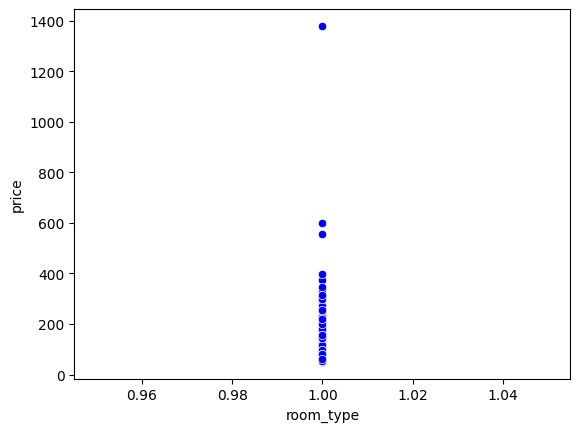

In [919]:
#
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)


In [920]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['room_type']])
y_pred


array([134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07023411,
       134.07023411, 134.07023411, 134.07023411, 134.07

In [921]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1


,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,134.070234,70.0,1,4.90,100%,f,f,f,4.0,1.0,Entire rental unit
1,134.070234,100.0,1,4.87,82%,t,f,f,2.0,1.0,Entire rental unit
2,134.070234,75.0,1,4.45,99%,t,f,f,2.0,1.0,Entire rental unit
3,134.070234,117.0,1,4.71,82%,t,f,f,2.0,1.0,Entire rental unit
4,134.070234,85.0,1,4.83,100%,t,f,f,4.0,1.0,Entire rental unit
...,...,...,...,...,...,...,...,...,...,...,...
411,134.070234,81.0,1,5.00,100%,f,f,t,2.0,1.0,Entire rental unit
414,134.070234,60.0,1,4.90,100%,t,f,f,2.0,1.0,Entire rental unit
415,134.070234,155.0,1,5.00,100%,t,f,t,6.0,1.0,Entire home
416,134.070234,316.0,1,4.90,98%,t,t,t,3.0,1.0,Entire rental unit


<Axes: xlabel='room_type', ylabel='price'>

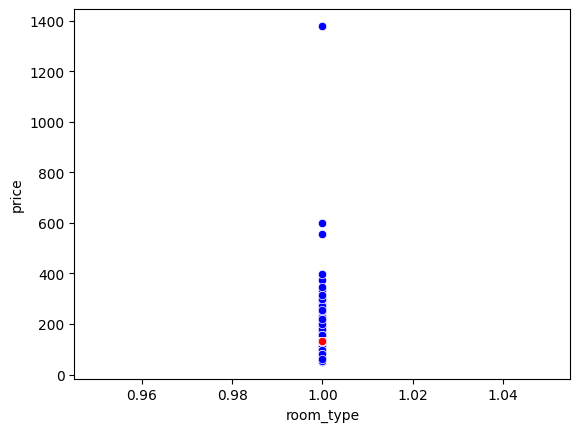

In [922]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y='Predicciones', color="red", data=df1)


In [923]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0

In [924]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

room_type 2 ---------------------------------------------------

In [925]:
df1 = dfC[dfC["room_type"] ==2]

In [926]:
Var_Dep= df1['price']
Vars_Indep= df1['room_type'].to_frame()

In [927]:
#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [928]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [929]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)

LinearRegression()

In [930]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(77.0)}

<Axes: xlabel='room_type', ylabel='price'>

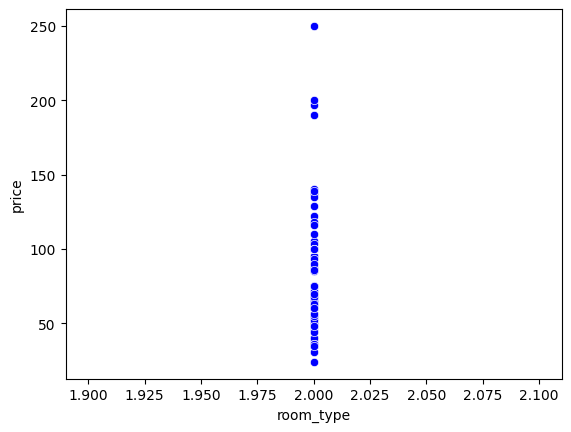

In [931]:
#
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)


In [932]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['room_type']])
y_pred


array([77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77.,
       77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77.,
       77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77.,
       77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77.,
       77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77.,
       77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77.,
       77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77.,
       77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77.,
       77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77., 77.,
       77., 77., 77., 77.])

In [933]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1


,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
5,77.0,65.0,2,4.50,99%,t,f,f,2.0,1.0,Private room in rental unit
8,77.0,55.0,2,4.90,83%,t,f,f,1.0,1.0,Private room in home
9,77.0,45.0,2,4.46,96%,t,f,t,2.0,1.0,Private room in home
10,77.0,50.0,2,4.57,100%,t,f,f,1.0,1.0,Private room in rental unit
12,77.0,45.0,2,4.57,96%,t,f,t,1.0,1.0,Private room in home
...,...,...,...,...,...,...,...,...,...,...,...
412,77.0,63.0,2,5.00,98%,t,t,f,2.0,1.0,Private room in rental unit
413,77.0,100.0,2,4.90,40%,f,f,t,3.0,1.0,Private room in rental unit
418,77.0,70.0,2,4.90,65%,t,f,t,1.0,1.0,Private room in rental unit
419,77.0,60.0,2,4.90,100%,t,f,f,1.0,1.0,Private room in home


<Axes: xlabel='room_type', ylabel='price'>

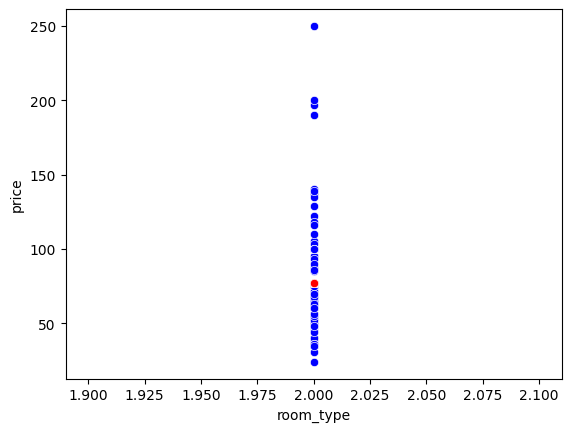

In [934]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y='Predicciones', color="red", data=df1)


In [935]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0

In [936]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.0)

room_type 3***********************************************************

In [937]:
df1 = dfC[dfC["room_type"] ==3]

In [938]:
Var_Dep= df1['price']
Vars_Indep= df1[['room_type']]


In [939]:
#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [940]:
#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [941]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)

LinearRegression()

In [942]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(45.0)}

<Axes: xlabel='room_type', ylabel='price'>

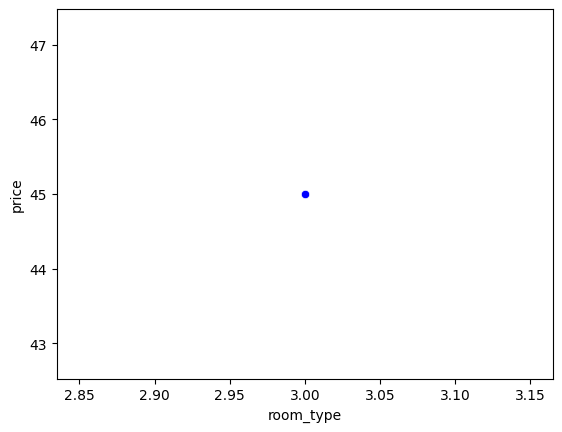

In [943]:
#
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)


In [944]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['room_type']])
y_pred


array([45.])

In [945]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1


,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
95,45.0,45.0,3,4.9,0%,t,f,f,2.0,1.0,Shared room in rental unit


<Axes: xlabel='room_type', ylabel='price'>

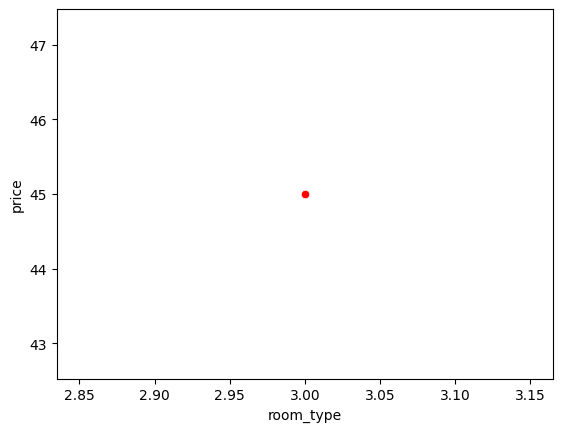

In [946]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y='Predicciones', color="red", data=df1)


In [947]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


c:\Users\ady_b\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [948]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(nan)

room_type 4************************************************

In [949]:
df1 = dfC[dfC["room_type"] ==4]

In [950]:
Var_Dep= df1['price']
Vars_Indep= df1['room_type'].to_frame()


In [951]:
#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [952]:
#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [953]:
#Ajustamos el modelo con las variables antes declaradas
#model.fit(X = Vars_Indep, y=Var_Dep)


In [954]:
print(df['room_type'].value_counts())

#NO hay registros para esta varaible 


room_type
1    299
2    121
3      1
Name: count, dtype: int64


**review_scores_cleanliness**


In [955]:
df1=df

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

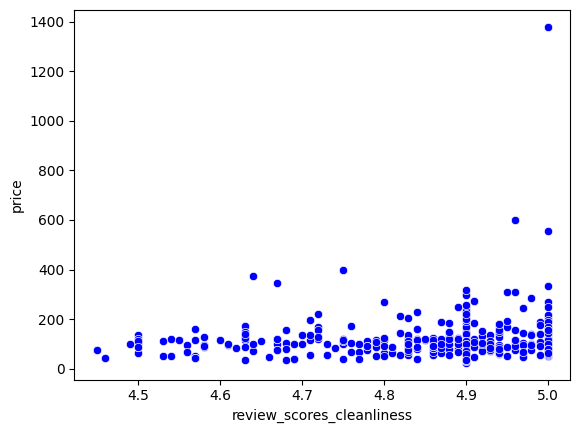

In [956]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)

In [957]:
Var_Dep= df1['price']
Vars_Indep=df1[['review_scores_cleanliness']]

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [958]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [959]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([66.51480332]),
 'rank_': 1,
 'singular_': array([2.71343827]),
 'intercept_': np.float64(-206.00969733813696)}

*****************************************************************************

In [960]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['review_scores_cleanliness']])
y_pred


array([119.91283894, 117.91739484,  89.98117744, 107.2750263 ,
       115.2568027 ,  93.30691761, 112.59621057, 125.2340232 ,
       119.91283894,  90.64632547,  97.96295384, 107.94017434,
        97.96295384, 122.57343107, 117.91739484, 102.61899007,
        95.30236171,  97.96295384, 122.57343107,  95.96750974,
       120.57798697, 113.2613586 , 121.90828303, 121.90828303,
       105.94473024, 115.92195074, 126.56431927, 111.2659145 ,
       105.2795822 , 101.95384204, 121.243135  , 111.93106254,
       123.90372713, 121.90828303, 115.2568027 , 119.91283894,
       126.56431927, 115.2568027 , 121.243135  , 107.2750263 ,
       125.2340232 , 124.56887517, 113.92650664, 115.2568027 ,
       107.2750263 , 126.56431927, 110.60076647, 122.57343107,
       103.94928614, 125.2340232 , 126.56431927, 105.2795822 ,
       109.93561844, 117.91739484, 123.2385791 , 115.2568027 ,
       117.91739484, 125.89917123, 110.60076647, 109.2704704 ,
       105.2795822 , 122.57343107, 125.89917123, 126.56

In [961]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1


,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,119.912839,70.0,1,4.90,100%,f,f,f,4.0,1.0,Entire rental unit
1,117.917395,100.0,1,4.87,82%,t,f,f,2.0,1.0,Entire rental unit
2,89.981177,75.0,1,4.45,99%,t,f,f,2.0,1.0,Entire rental unit
3,107.275026,117.0,1,4.71,82%,t,f,f,2.0,1.0,Entire rental unit
4,115.256803,85.0,1,4.83,100%,t,f,f,4.0,1.0,Entire rental unit
...,...,...,...,...,...,...,...,...,...,...,...
416,119.912839,316.0,1,4.90,98%,t,t,t,3.0,1.0,Entire rental unit
417,119.912839,219.0,1,4.90,0.9,t,f,f,6.0,1.0,Entire home
418,119.912839,70.0,2,4.90,65%,t,f,t,1.0,1.0,Private room in rental unit
419,119.912839,60.0,2,4.90,100%,t,f,f,1.0,1.0,Private room in home


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

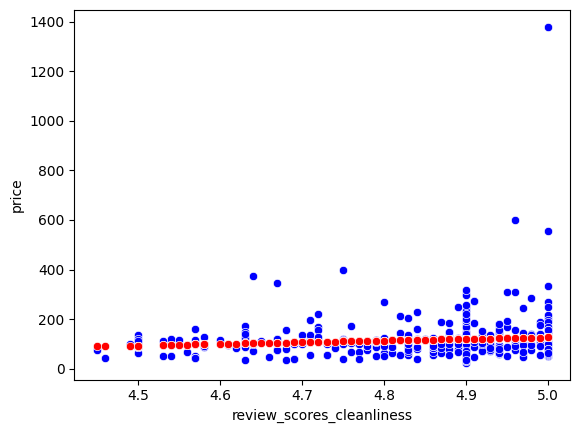

In [962]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=df1)


In [963]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.009639165347544942

In [964]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.09817925110503208)

*******************************************************

In [965]:
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.rstrip('%').astype(float) / 100


In [966]:
print(df1['host_acceptance_rate'].dtype)


float64


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

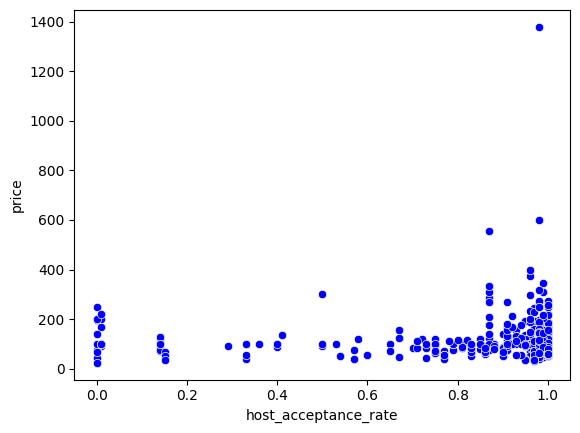

In [967]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1) 


In [968]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep= df1['price']
Vars_Indep= df1[['host_acceptance_rate']]

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [969]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [970]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([25.10031543]),
 'rank_': 1,
 'singular_': array([5.10689115]),
 'intercept_': np.float64(95.88987791483116)}

In [971]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['host_acceptance_rate']])
y_pred


array([120.99019334, 116.47213657, 120.73919019, 116.47213657,
       120.99019334, 120.73919019, 119.98618073, 117.72715234,
       116.72313972, 119.98618073, 120.99019334, 120.99019334,
       119.98618073, 117.72715234, 120.99019334, 119.98618073,
       116.72313972, 119.98618073, 118.4801618 , 119.98618073,
       120.99019334, 117.72715234, 119.73517757, 120.73919019,
       119.73517757, 120.73919019, 117.72715234, 120.48818704,
       119.73517757, 119.73517757, 120.73919019, 117.72715234,
       110.19705771, 120.73919019, 117.72715234, 115.2171208 ,
       120.99019334,  96.11578075, 120.73919019,  95.88987791,
       118.73116496, 118.4801618 , 120.99019334, 120.73919019,
       120.73919019, 120.99019334, 116.47213657, 120.73919019,
       112.70708925, 120.99019334, 120.99019334, 120.73919019,
       120.73919019, 120.48818704, 118.4801618 , 120.48818704,
        99.40392207, 120.99019334, 120.99019334,  99.40392207,
       120.99019334, 120.48818704, 116.47213657,  96.11

In [972]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones2', y_pred)
df1


,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,120.990193,119.912839,70.0,1,4.90,1.000,f,f,f,4.0,1.0,Entire rental unit
1,116.472137,117.917395,100.0,1,4.87,0.820,t,f,f,2.0,1.0,Entire rental unit
2,120.739190,89.981177,75.0,1,4.45,0.990,t,f,f,2.0,1.0,Entire rental unit
3,116.472137,107.275026,117.0,1,4.71,0.820,t,f,f,2.0,1.0,Entire rental unit
4,120.990193,115.256803,85.0,1,4.83,1.000,t,f,f,4.0,1.0,Entire rental unit
...,...,...,...,...,...,...,...,...,...,...,...,...
416,120.488187,119.912839,316.0,1,4.90,0.980,t,t,t,3.0,1.0,Entire rental unit
417,96.115781,119.912839,219.0,1,4.90,0.009,t,f,f,6.0,1.0,Entire home
418,112.205083,119.912839,70.0,2,4.90,0.650,t,f,t,1.0,1.0,Private room in rental unit
419,120.990193,119.912839,60.0,2,4.90,1.000,t,f,f,1.0,1.0,Private room in home


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

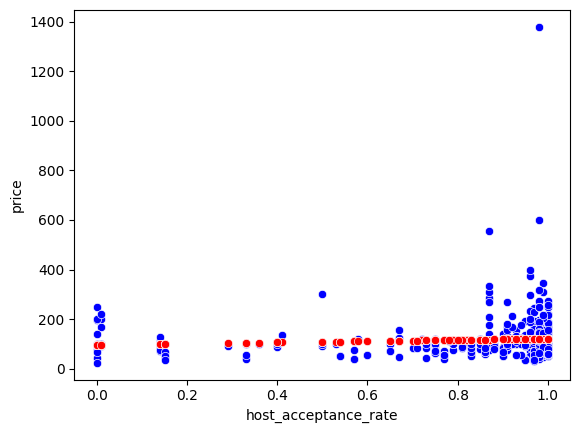

In [973]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="red", data=df1)


In [974]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.00486221854654989

In [975]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.06972961025669003)

**host_identity_verified**
*******************************************************

In [976]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\ady_b\AppData\Local\Temp\ipykernel_21580\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


<Axes: xlabel='host_identity_verified', ylabel='price'>

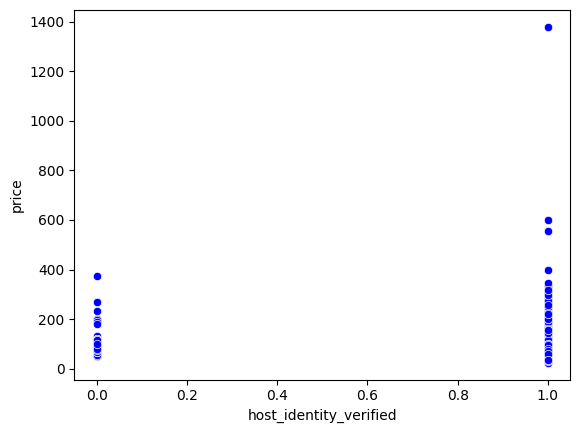

In [977]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1) 


In [978]:

Var_Dep= df1['price']
Vars_Indep= df1['host_identity_verified'].to_frame()

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [979]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [980]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.31158392]),
 'rank_': 1,
 'singular_': array([6.33956022]),
 'intercept_': np.float64(117.17777777777776)}

In [981]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['host_identity_verified']])
y_pred


array([117.17777778, 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.17777778, 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.17777778, 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.17777778, 117.4893617 ,
       117.4893617 , 117.4893617 , 117.17777778, 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.4893617 ,
       117.4893617 , 117.4893617 , 117.4893617 , 117.48

In [982]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones3', y_pred)
df1


,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,117.177778,120.990193,119.912839,70.0,1,4.90,1.000,0,f,f,4.0,1.0,Entire rental unit
1,117.489362,116.472137,117.917395,100.0,1,4.87,0.820,1,f,f,2.0,1.0,Entire rental unit
2,117.489362,120.739190,89.981177,75.0,1,4.45,0.990,1,f,f,2.0,1.0,Entire rental unit
3,117.489362,116.472137,107.275026,117.0,1,4.71,0.820,1,f,f,2.0,1.0,Entire rental unit
4,117.489362,120.990193,115.256803,85.0,1,4.83,1.000,1,f,f,4.0,1.0,Entire rental unit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,117.489362,120.488187,119.912839,316.0,1,4.90,0.980,1,t,t,3.0,1.0,Entire rental unit
417,117.489362,96.115781,119.912839,219.0,1,4.90,0.009,1,f,f,6.0,1.0,Entire home
418,117.489362,112.205083,119.912839,70.0,2,4.90,0.650,1,f,t,1.0,1.0,Private room in rental unit
419,117.489362,120.990193,119.912839,60.0,2,4.90,1.000,1,f,f,1.0,1.0,Private room in home


<Axes: xlabel='host_identity_verified', ylabel='price'>

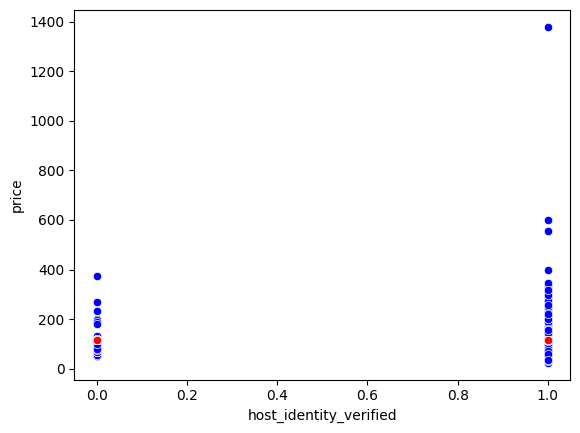

In [983]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y='Predicciones3', color="red", data=df1)


In [984]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


1.154599228780917e-06

In [985]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl



np.float64(0.0010745227911872865)

**host_is_superhost**
*****************************************************

In [986]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\ady_b\AppData\Local\Temp\ipykernel_21580\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


<Axes: xlabel='host_is_superhost', ylabel='price'>

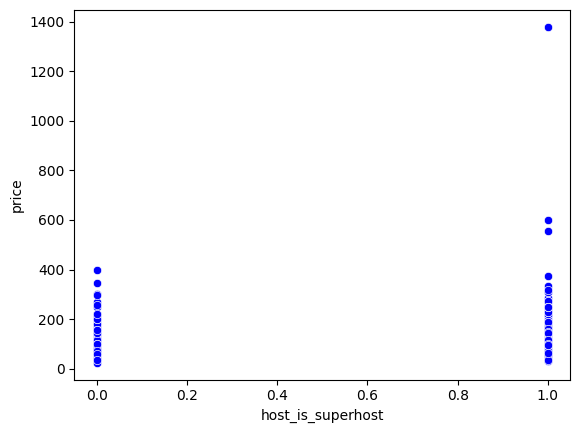

In [987]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1) 


In [988]:

Var_Dep= df1['price']
Vars_Indep= df1['host_is_superhost'].to_frame()

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [989]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [990]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([14.59111292]),
 'rank_': 1,
 'singular_': array([10.24103803]),
 'intercept_': np.float64(109.72727272727273)}

In [991]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['host_is_superhost']])
y_pred


array([109.72727273, 109.72727273, 109.72727273, 109.72727273,
       109.72727273, 109.72727273, 124.31838565, 124.31838565,
       109.72727273, 109.72727273, 109.72727273, 109.72727273,
       109.72727273, 124.31838565, 124.31838565, 124.31838565,
       109.72727273, 109.72727273, 124.31838565, 109.72727273,
       124.31838565, 124.31838565, 124.31838565, 124.31838565,
       124.31838565, 124.31838565, 124.31838565, 124.31838565,
       124.31838565, 124.31838565, 124.31838565, 124.31838565,
       109.72727273, 124.31838565, 124.31838565, 124.31838565,
       109.72727273, 109.72727273, 124.31838565, 109.72727273,
       124.31838565, 124.31838565, 124.31838565, 109.72727273,
       109.72727273, 109.72727273, 109.72727273, 124.31838565,
       109.72727273, 124.31838565, 109.72727273, 109.72727273,
       109.72727273, 124.31838565, 124.31838565, 124.31838565,
       124.31838565, 124.31838565, 109.72727273, 124.31838565,
       109.72727273, 124.31838565, 124.31838565, 109.72

In [992]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones4', y_pred)
df1


,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,109.727273,117.177778,120.990193,119.912839,70.0,1,4.90,1.000,0,0,f,4.0,1.0,Entire rental unit
1,109.727273,117.489362,116.472137,117.917395,100.0,1,4.87,0.820,1,0,f,2.0,1.0,Entire rental unit
2,109.727273,117.489362,120.739190,89.981177,75.0,1,4.45,0.990,1,0,f,2.0,1.0,Entire rental unit
3,109.727273,117.489362,116.472137,107.275026,117.0,1,4.71,0.820,1,0,f,2.0,1.0,Entire rental unit
4,109.727273,117.489362,120.990193,115.256803,85.0,1,4.83,1.000,1,0,f,4.0,1.0,Entire rental unit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,124.318386,117.489362,120.488187,119.912839,316.0,1,4.90,0.980,1,1,t,3.0,1.0,Entire rental unit
417,109.727273,117.489362,96.115781,119.912839,219.0,1,4.90,0.009,1,0,f,6.0,1.0,Entire home
418,109.727273,117.489362,112.205083,119.912839,70.0,2,4.90,0.650,1,0,t,1.0,1.0,Private room in rental unit
419,109.727273,117.489362,120.990193,119.912839,60.0,2,4.90,1.000,1,0,f,1.0,1.0,Private room in home


<Axes: xlabel='host_is_superhost', ylabel='price'>

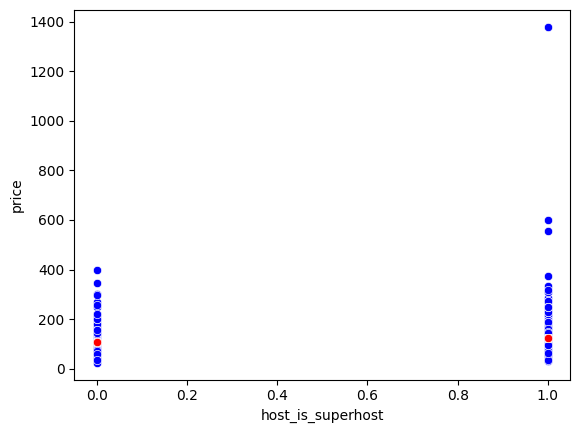

In [993]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y='Predicciones4', color="red", data=df1)


In [994]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.006607356030026268

In [995]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.08128564467374462)

**instant_bookable**
**********************************************************

In [996]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\ady_b\AppData\Local\Temp\ipykernel_21580\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


<Axes: xlabel='instant_bookable', ylabel='price'>

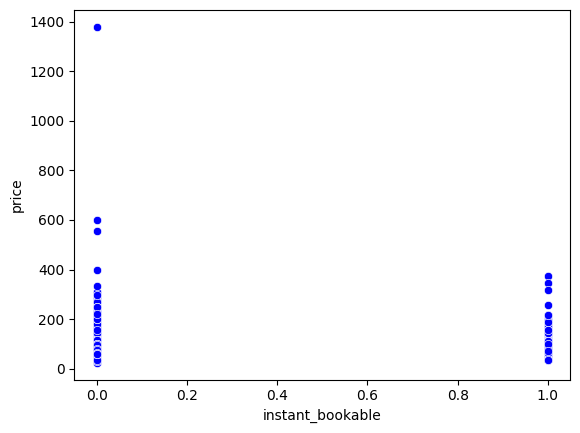

In [997]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1) 


In [998]:

Var_Dep= df1['price']
Vars_Indep= df1[['instant_bookable']]

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [999]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [1000]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.65514998]),
 'rank_': 1,
 'singular_': array([8.54469874]),
 'intercept_': np.float64(118.27217125382263)}

In [1001]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['instant_bookable']])
y_pred


array([118.27217125, 118.27217125, 118.27217125, 118.27217125,
       118.27217125, 118.27217125, 118.27217125, 118.27217125,
       118.27217125, 114.61702128, 118.27217125, 118.27217125,
       114.61702128, 118.27217125, 114.61702128, 118.27217125,
       118.27217125, 114.61702128, 118.27217125, 114.61702128,
       118.27217125, 118.27217125, 118.27217125, 118.27217125,
       114.61702128, 118.27217125, 118.27217125, 118.27217125,
       114.61702128, 114.61702128, 118.27217125, 118.27217125,
       118.27217125, 118.27217125, 118.27217125, 118.27217125,
       118.27217125, 118.27217125, 118.27217125, 118.27217125,
       118.27217125, 118.27217125, 114.61702128, 118.27217125,
       118.27217125, 118.27217125, 118.27217125, 118.27217125,
       118.27217125, 114.61702128, 118.27217125, 118.27217125,
       118.27217125, 118.27217125, 118.27217125, 118.27217125,
       118.27217125, 118.27217125, 118.27217125, 118.27217125,
       118.27217125, 114.61702128, 118.27217125, 118.27

In [1002]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones5', y_pred)
df1


,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,118.272171,109.727273,117.177778,120.990193,119.912839,70.0,1,4.90,1.000,0,0,0,4.0,1.0,Entire rental unit
1,118.272171,109.727273,117.489362,116.472137,117.917395,100.0,1,4.87,0.820,1,0,0,2.0,1.0,Entire rental unit
2,118.272171,109.727273,117.489362,120.739190,89.981177,75.0,1,4.45,0.990,1,0,0,2.0,1.0,Entire rental unit
3,118.272171,109.727273,117.489362,116.472137,107.275026,117.0,1,4.71,0.820,1,0,0,2.0,1.0,Entire rental unit
4,118.272171,109.727273,117.489362,120.990193,115.256803,85.0,1,4.83,1.000,1,0,0,4.0,1.0,Entire rental unit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,114.617021,124.318386,117.489362,120.488187,119.912839,316.0,1,4.90,0.980,1,1,1,3.0,1.0,Entire rental unit
417,118.272171,109.727273,117.489362,96.115781,119.912839,219.0,1,4.90,0.009,1,0,0,6.0,1.0,Entire home
418,114.617021,109.727273,117.489362,112.205083,119.912839,70.0,2,4.90,0.650,1,0,1,1.0,1.0,Private room in rental unit
419,118.272171,109.727273,117.489362,120.990193,119.912839,60.0,2,4.90,1.000,1,0,0,1.0,1.0,Private room in home


<Axes: xlabel='instant_bookable', ylabel='price'>

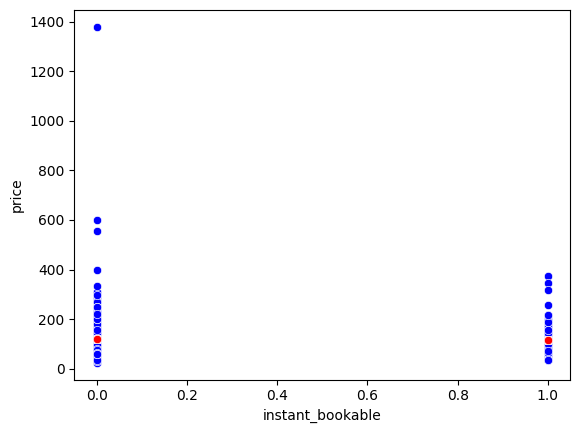

In [1003]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y='Predicciones5', color="red", data=df1)


In [1004]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0002886468535975295

In [1005]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.016989610166143587)

**bathrooms**
*************************************************

<Axes: xlabel='bathrooms', ylabel='accommodates'>

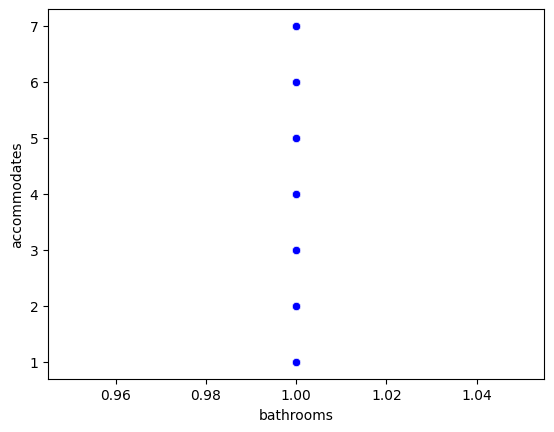

In [1006]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1) 


In [1007]:

Var_Dep= df1['accommodates']
Vars_Indep= df1[['bathrooms']]

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [1008]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [1009]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(2.983372921615202)}

In [1010]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['bathrooms']])
y_pred


array([2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337292,
       2.98337292, 2.98337292, 2.98337292, 2.98337292, 2.98337

In [1011]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones6', y_pred)
df1


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,2.983373,118.272171,109.727273,117.177778,120.990193,119.912839,70.0,1,4.90,1.000,0,0,0,4.0,1.0,Entire rental unit
1,2.983373,118.272171,109.727273,117.489362,116.472137,117.917395,100.0,1,4.87,0.820,1,0,0,2.0,1.0,Entire rental unit
2,2.983373,118.272171,109.727273,117.489362,120.739190,89.981177,75.0,1,4.45,0.990,1,0,0,2.0,1.0,Entire rental unit
3,2.983373,118.272171,109.727273,117.489362,116.472137,107.275026,117.0,1,4.71,0.820,1,0,0,2.0,1.0,Entire rental unit
4,2.983373,118.272171,109.727273,117.489362,120.990193,115.256803,85.0,1,4.83,1.000,1,0,0,4.0,1.0,Entire rental unit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2.983373,114.617021,124.318386,117.489362,120.488187,119.912839,316.0,1,4.90,0.980,1,1,1,3.0,1.0,Entire rental unit
417,2.983373,118.272171,109.727273,117.489362,96.115781,119.912839,219.0,1,4.90,0.009,1,0,0,6.0,1.0,Entire home
418,2.983373,114.617021,109.727273,117.489362,112.205083,119.912839,70.0,2,4.90,0.650,1,0,1,1.0,1.0,Private room in rental unit
419,2.983373,118.272171,109.727273,117.489362,120.990193,119.912839,60.0,2,4.90,1.000,1,0,0,1.0,1.0,Private room in home


<Axes: xlabel='bathrooms', ylabel='accommodates'>

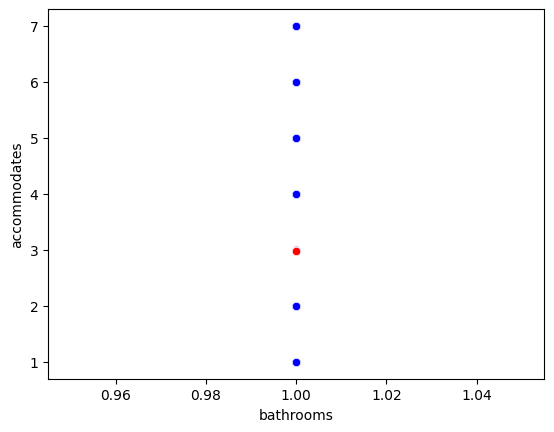

In [1012]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y='Predicciones6', color="red", data=df1)


In [1013]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0

In [1014]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.0)

**property_type**
********************************************************

In [1015]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Entire home': 4,
    'Private room in condo': 5,
    'Entire townhouse': 6,
    'Private room in home': 7,
    'Entire villa': 8,
    'Entire loft': 9,
    'Private room in villa': 10,
    'Entire serviced apartment': 11,
    'Private room in townhouse': 12,
    'Room in hotel': 13,
    'Entire guesthouse': 14,
    'Private room in bed and breakfast': 15,
    'Room in aparthotel': 16,
    'Private room in guest suite': 17,
    'Private room in casa particular': 18,
    'Shared room in hotel': 19,
    'Private room in guesthouse': 20,
    'Tiny home': 21,
    'Shared room in hostel': 22,
    'Private room in serviced apartment': 23,
    'Private room in boat': 24,
    'Houseboat': 25,
    'Entire guest suite': 26,
    'Boat': 27,
    'Shared room in rental unit': 28,
    'Shared room in condo': 29,
    'Private room in loft': 30,
    'Private room': 31,
    'Private room in bungalow': 32,
    'Private room in hostel': 33,
    'Entire bungalow': 34,
    'Entire vacation home': 35,
    'Entire cabin': 36,
    'Private room in shipping container': 37,
    'Room in hostel': 38,
    'Camper/RV': 39,
    'Entire place': 40,
    'Barn': 41,
    'Casa particular': 42,
    'Entire cottage': 43,
    'Private room in hut': 44,
    'Shared room in bungalow': 45,
    'Private room in tiny home': 46,
    'Shared room in bed and breakfast': 47,
    'Private room in vacation home': 48,
    'Hut': 49,
    'Private room in barn': 50,
    'Minsu': 51,
    'Shipping container': 52,
    'Private room in cabin': 53,
    'Tower': 54
})


C:\Users\ady_b\AppData\Local\Temp\ipykernel_21580\3831950754.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


<Axes: xlabel='property_type', ylabel='price'>

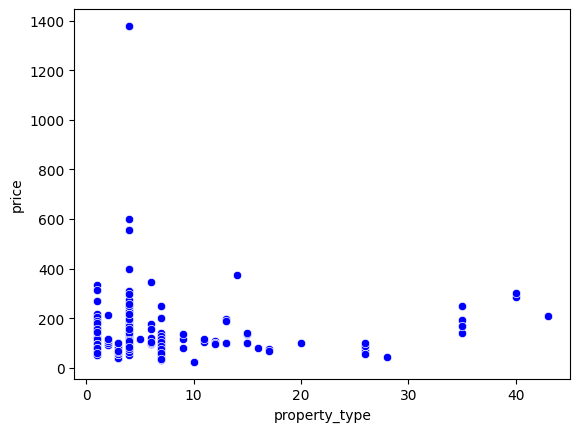

In [1016]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='property_type', y='price', color="blue", data=df1) 


In [1017]:
Var_Dep= df1['price']
Vars_Indep= df1['property_type'].to_frame()

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [1018]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [1019]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.80753105]),
 'rank_': 1,
 'singular_': array([127.52547135]),
 'intercept_': np.float64(113.69461190754673)}

In [1020]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['property_type']])
y_pred


array([114.50214296, 114.50214296, 114.50214296, 114.50214296,
       114.50214296, 116.11720505, 116.9247361 , 145.99585386,
       119.34732925, 119.34732925, 116.11720505, 116.9247361 ,
       119.34732925, 116.9247361 , 119.34732925, 114.50214296,
       119.34732925, 119.34732925, 119.34732925, 119.34732925,
       116.9247361 , 116.9247361 , 114.50214296, 116.9247361 ,
       119.34732925, 114.50214296, 116.9247361 , 114.50214296,
       119.34732925, 119.34732925, 119.34732925, 114.50214296,
       127.42263974, 127.42263974, 114.50214296, 134.69041918,
       119.34732925, 114.50214296, 116.11720505, 116.9247361 ,
       116.11720505, 116.11720505, 119.34732925, 120.96239135,
       134.69041918, 119.34732925, 122.57745345, 119.34732925,
       119.34732925, 119.34732925, 119.34732925, 114.50214296,
       114.50214296, 114.50214296, 119.34732925, 114.50214296,
       114.50214296, 119.34732925, 114.50214296, 114.50214296,
       114.50214296, 114.50214296, 116.9247361 , 116.92

In [1021]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones7', y_pred)
df1


,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,114.502143,2.983373,118.272171,109.727273,117.177778,120.990193,119.912839,70.0,1,4.90,1.000,0,0,0,4.0,1.0,1
1,114.502143,2.983373,118.272171,109.727273,117.489362,116.472137,117.917395,100.0,1,4.87,0.820,1,0,0,2.0,1.0,1
2,114.502143,2.983373,118.272171,109.727273,117.489362,120.739190,89.981177,75.0,1,4.45,0.990,1,0,0,2.0,1.0,1
3,114.502143,2.983373,118.272171,109.727273,117.489362,116.472137,107.275026,117.0,1,4.71,0.820,1,0,0,2.0,1.0,1
4,114.502143,2.983373,118.272171,109.727273,117.489362,120.990193,115.256803,85.0,1,4.83,1.000,1,0,0,4.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,114.502143,2.983373,114.617021,124.318386,117.489362,120.488187,119.912839,316.0,1,4.90,0.980,1,1,1,3.0,1.0,1
417,116.924736,2.983373,118.272171,109.727273,117.489362,96.115781,119.912839,219.0,1,4.90,0.009,1,0,0,6.0,1.0,4
418,116.117205,2.983373,114.617021,109.727273,117.489362,112.205083,119.912839,70.0,2,4.90,0.650,1,0,1,1.0,1.0,3
419,119.347329,2.983373,118.272171,109.727273,117.489362,120.990193,119.912839,60.0,2,4.90,1.000,1,0,0,1.0,1.0,7


<Axes: xlabel='property_type', ylabel='price'>

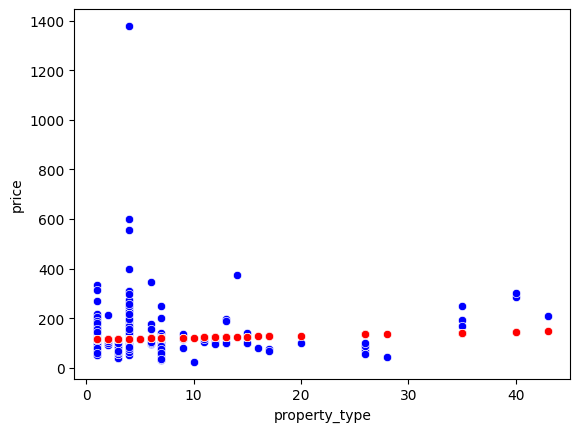

In [1022]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y='Predicciones7', color="red", data=df1)


In [1023]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.003138161198938172

In [1024]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.056019293095666355)

GRAFICAS
**************************************************

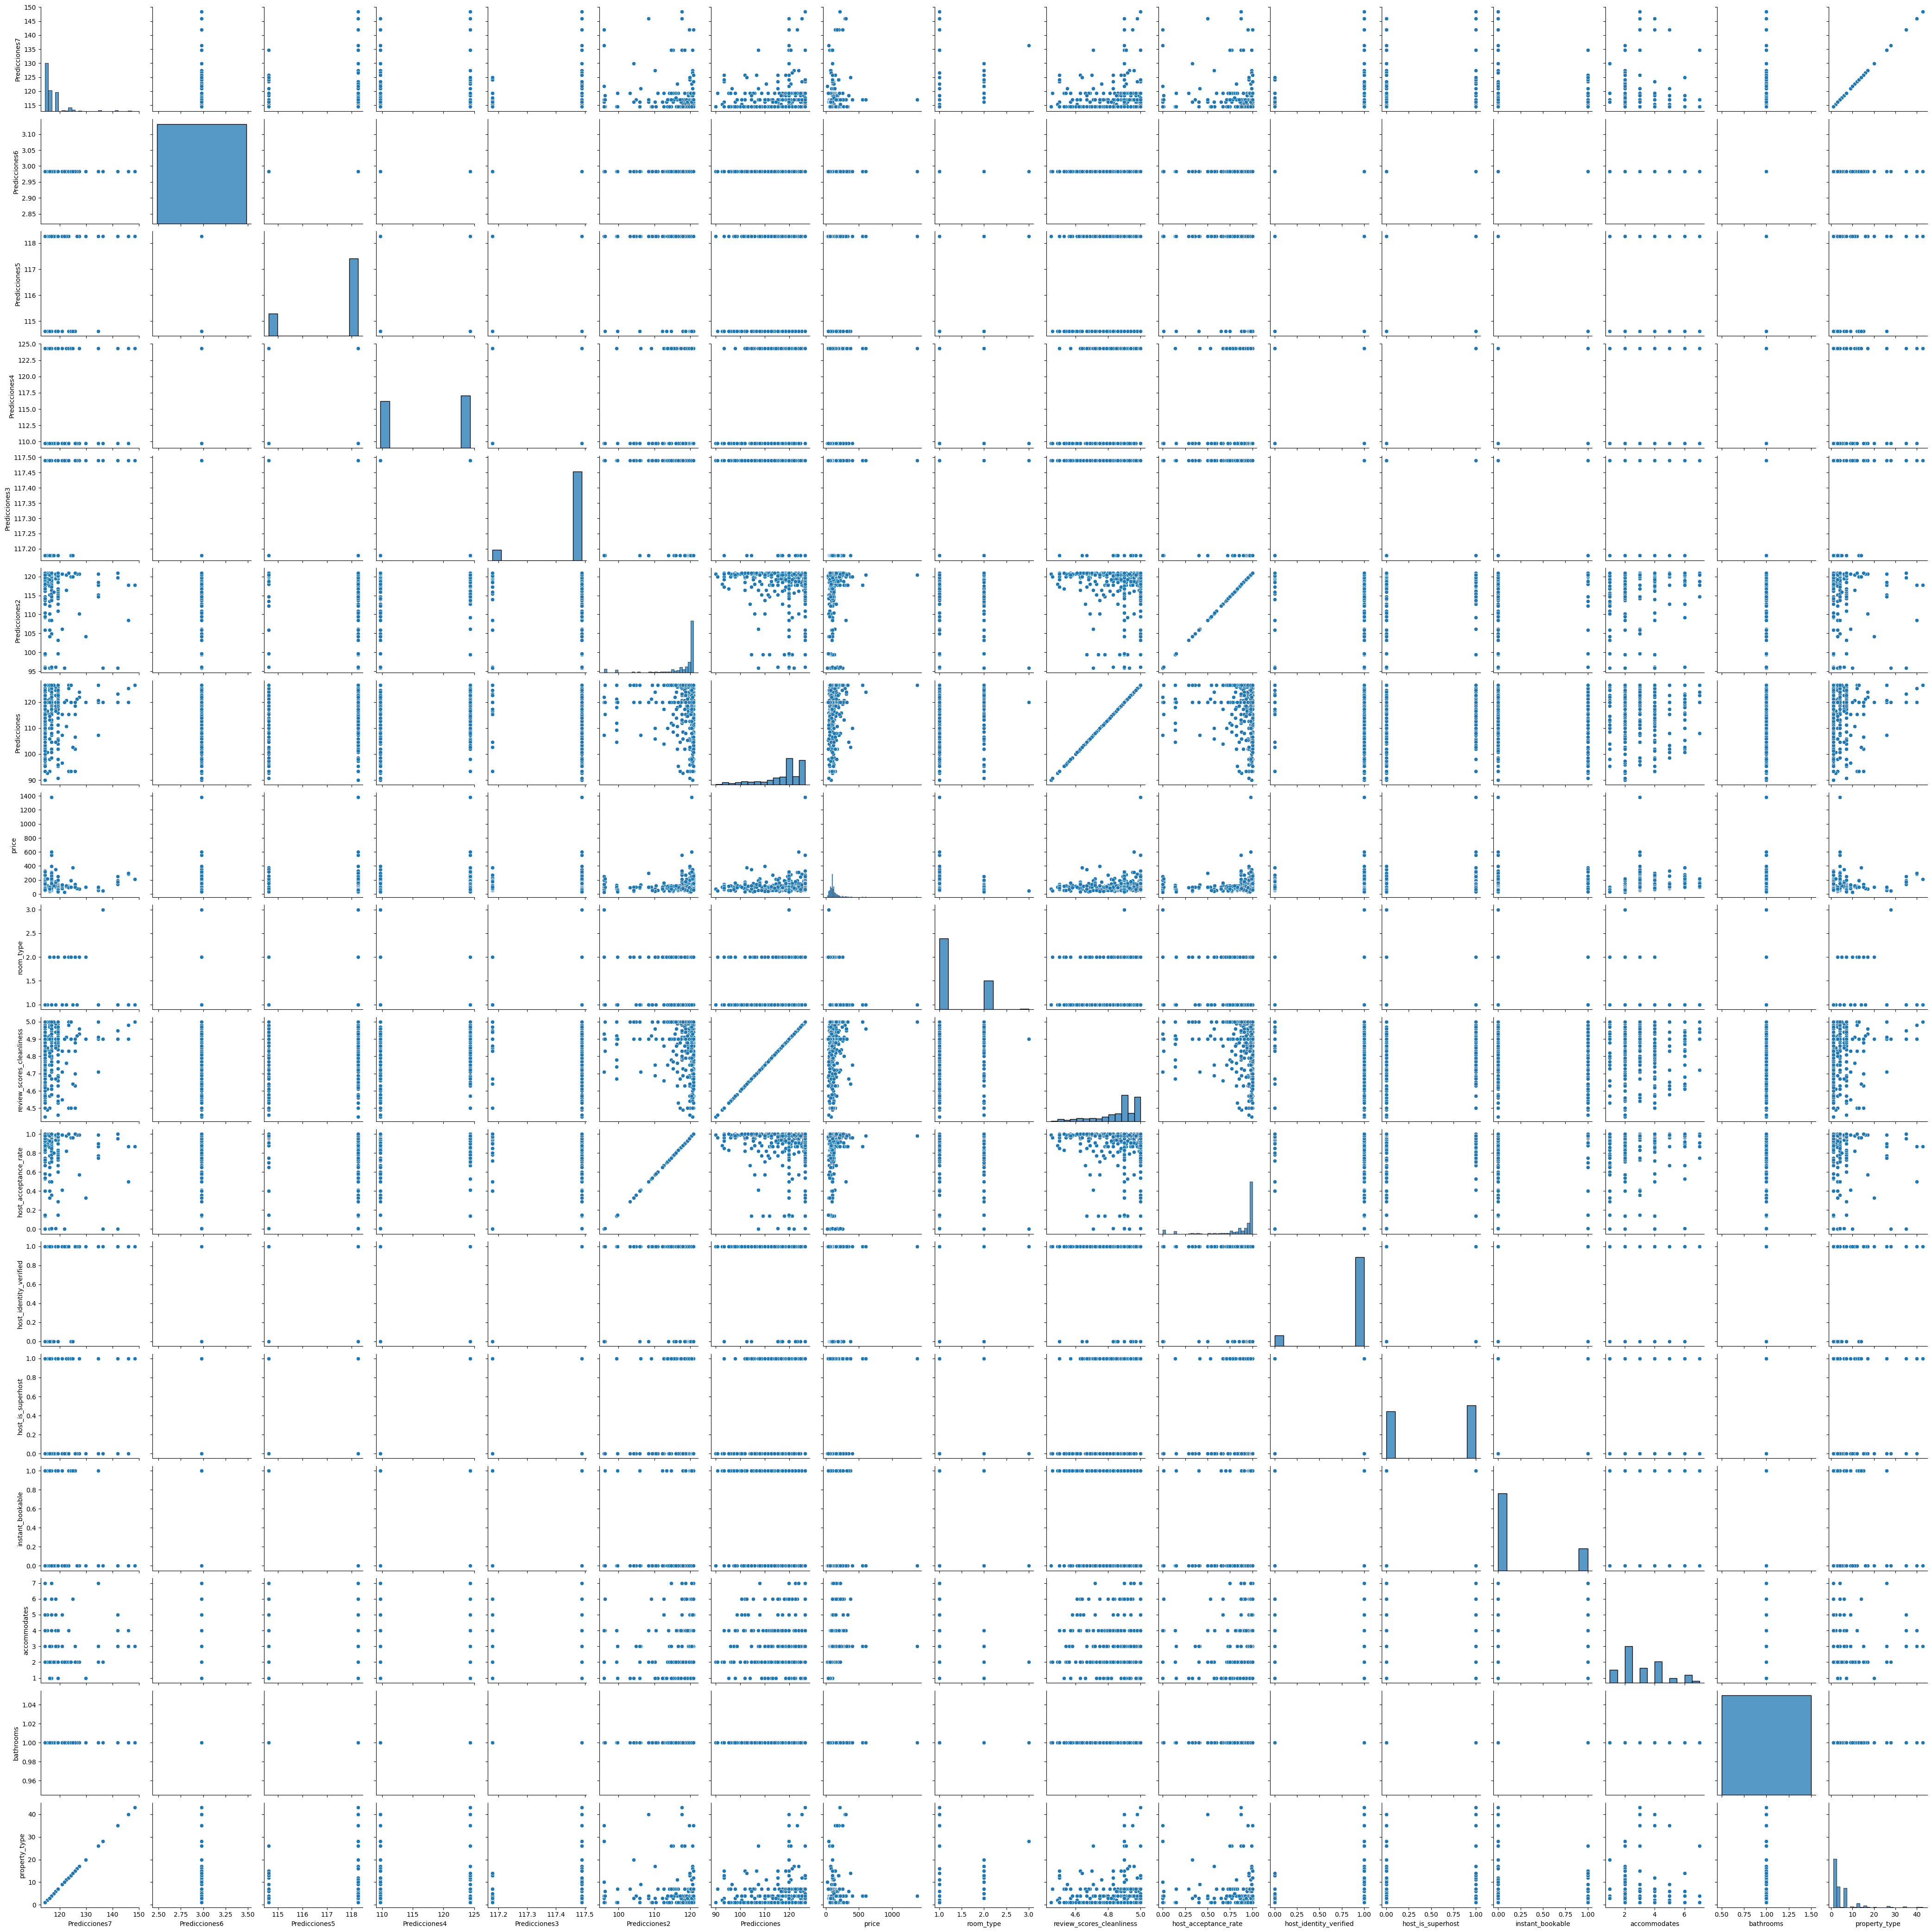

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(df1)

In [1027]:
#Encontramos todas las correlaciones entre las varaibles
Corr_Factors=df1.corr()
Corr_Factors

,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicciones7,1.000000,NaN,-0.033177,0.004805,-0.058620,-0.064297,0.091556,0.056019,0.341561,0.091556,-0.064297,-0.058620,0.004805,0.033177,-0.139701,NaN,1.000000
Predicciones6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Predicciones5,-0.033177,NaN,1.000000,0.134744,0.183728,-0.167845,0.170711,0.016990,-0.093463,0.170711,-0.167845,0.183728,0.134744,-1.000000,-0.054867,NaN,-0.033177
Predicciones4,0.004805,NaN,0.134744,1.000000,-0.002524,0.184102,0.267978,0.081286,0.029467,0.267978,0.184102,-0.002524,1.000000,-0.134744,0.002225,NaN,0.004805
Predicciones3,-0.058620,NaN,0.183728,-0.002524,1.000000,0.016215,-0.073370,0.001075,-0.164682,-0.073370,0.016215,1.000000,-0.002524,-0.183728,0.011435,NaN,-0.058620
Predicciones2,-0.064297,NaN,-0.167845,0.184102,0.016215,1.000000,-0.113629,0.069730,-0.064353,-0.113629,1.000000,0.016215,0.184102,0.167845,0.031793,NaN,-0.064297
Predicciones,0.091556,NaN,0.170711,0.267978,-0.073370,-0.113629,1.000000,0.098179,0.082128,1.000000,-0.113629,-0.073370,0.267978,-0.170711,0.011407,NaN,0.091556
price,0.056019,NaN,0.016990,0.081286,0.001075,0.069730,0.098179,1.000000,-0.290515,0.098179,0.069730,0.001075,0.081286,-0.016990,0.293633,NaN,0.056019
room_type,0.341561,NaN,-0.093463,0.029467,-0.164682,-0.064353,0.082128,-0.290515,1.000000,0.082128,-0.064353,-0.164682,0.029467,0.093463,-0.555877,NaN,0.341561
review_scores_cleanliness,0.091556,NaN,0.170711,0.267978,-0.073370,-0.113629,1.000000,0.098179,0.082128,1.000000,-0.113629,-0.073370,0.267978,-0.170711,0.011407,NaN,0.091556


In [1028]:
#Enocntramos el valor absoluto de todas las relaciones entre las varaibles
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicciones7,1.000000,NaN,0.033177,0.004805,0.058620,0.064297,0.091556,0.056019,0.341561,0.091556,0.064297,0.058620,0.004805,0.033177,0.139701,NaN,1.000000
Predicciones6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Predicciones5,0.033177,NaN,1.000000,0.134744,0.183728,0.167845,0.170711,0.016990,0.093463,0.170711,0.167845,0.183728,0.134744,1.000000,0.054867,NaN,0.033177
Predicciones4,0.004805,NaN,0.134744,1.000000,0.002524,0.184102,0.267978,0.081286,0.029467,0.267978,0.184102,0.002524,1.000000,0.134744,0.002225,NaN,0.004805
Predicciones3,0.058620,NaN,0.183728,0.002524,1.000000,0.016215,0.073370,0.001075,0.164682,0.073370,0.016215,1.000000,0.002524,0.183728,0.011435,NaN,0.058620
Predicciones2,0.064297,NaN,0.167845,0.184102,0.016215,1.000000,0.113629,0.069730,0.064353,0.113629,1.000000,0.016215,0.184102,0.167845,0.031793,NaN,0.064297
Predicciones,0.091556,NaN,0.170711,0.267978,0.073370,0.113629,1.000000,0.098179,0.082128,1.000000,0.113629,0.073370,0.267978,0.170711,0.011407,NaN,0.091556
price,0.056019,NaN,0.016990,0.081286,0.001075,0.069730,0.098179,1.000000,0.290515,0.098179,0.069730,0.001075,0.081286,0.016990,0.293633,NaN,0.056019
room_type,0.341561,NaN,0.093463,0.029467,0.164682,0.064353,0.082128,0.290515,1.000000,0.082128,0.064353,0.164682,0.029467,0.093463,0.555877,NaN,0.341561
review_scores_cleanliness,0.091556,NaN,0.170711,0.267978,0.073370,0.113629,1.000000,0.098179,0.082128,1.000000,0.113629,0.073370,0.267978,0.170711,0.011407,NaN,0.091556


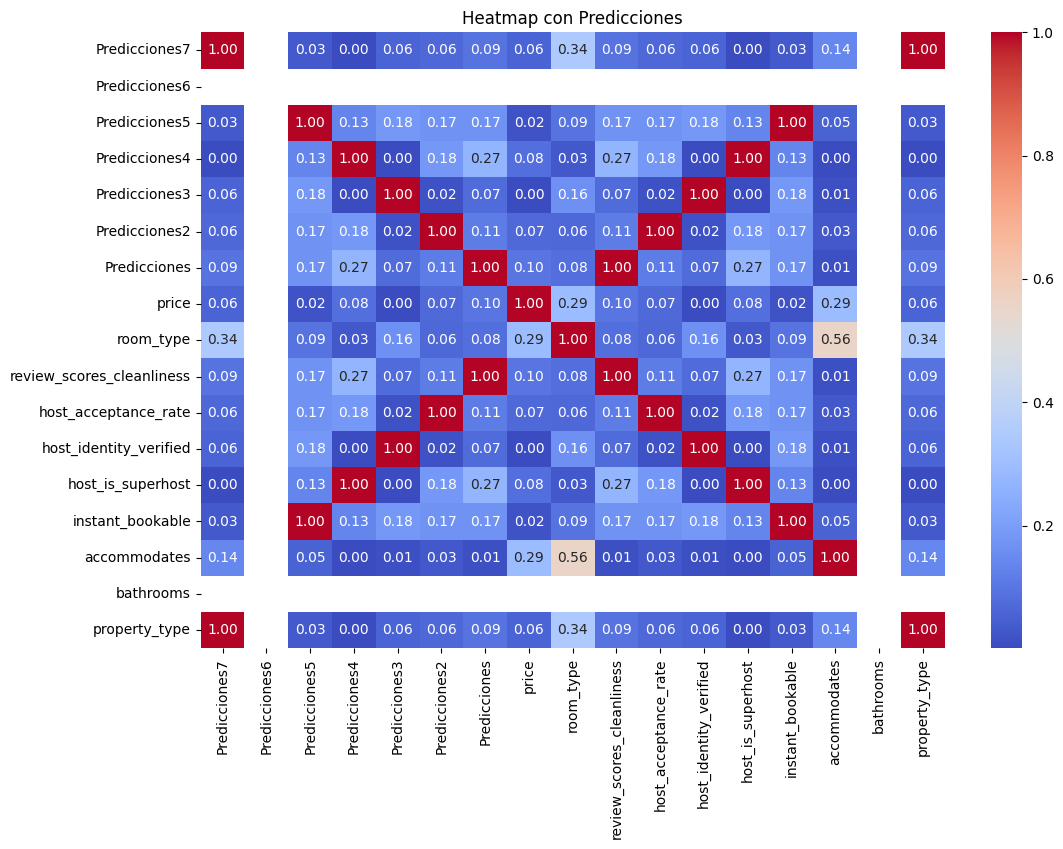

In [1037]:
#Graficamos el mapa de calor de los coeficientes de correlación
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors1, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()

<Axes: >

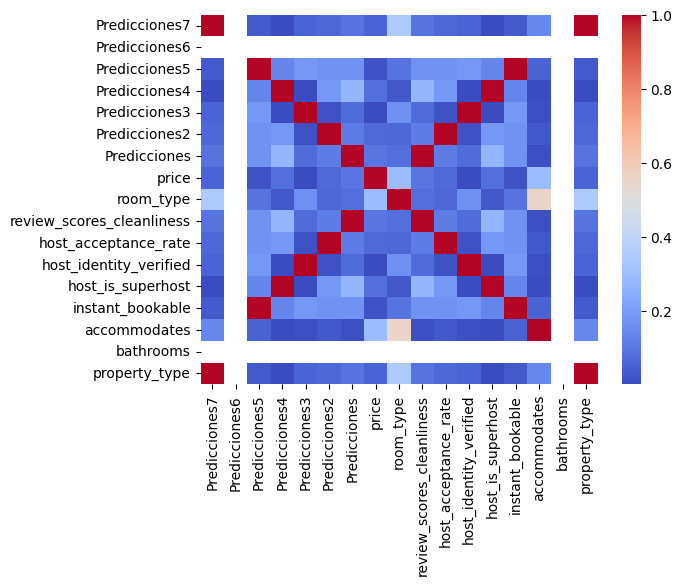

In [1036]:
#Graficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap='coolwarm')
Heat_Map

<Axes: >

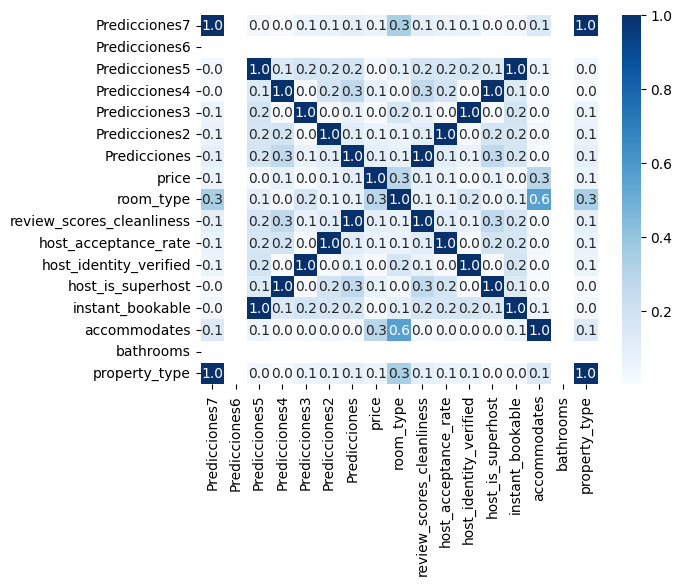

In [1032]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".01f")
Heat_Map